In [1]:
import pickle as pk
import os

skicit_scaler_file_path = os.path.join('datasets/demosath', f'skicit_scaler.pkl')
skicit_scaler_file_path = '../'+skicit_scaler_file_path

with open(skicit_scaler_file_path, "rb") as fb:
    skicit_scaler = pk.load(fb)

In [2]:
import numpy as np

results = np.load('../results/demosath/block/0.2/result_test_None.npy', allow_pickle=True).item()
np.shape(results["groundtruth"])


results["groundtruth"] = np.concatenate(results["groundtruth"] , axis=0)
results["imputed_data"] = np.concatenate(results["imputed_data"] , axis=0)

results["imputed_data"] = skicit_scaler.inverse_transform(results["imputed_data"])
results["groundtruth"] = skicit_scaler.inverse_transform(results["groundtruth"])


FileNotFoundError: [Errno 2] No such file or directory: '../results/demosath/block/0.2/result_test_None.npy'

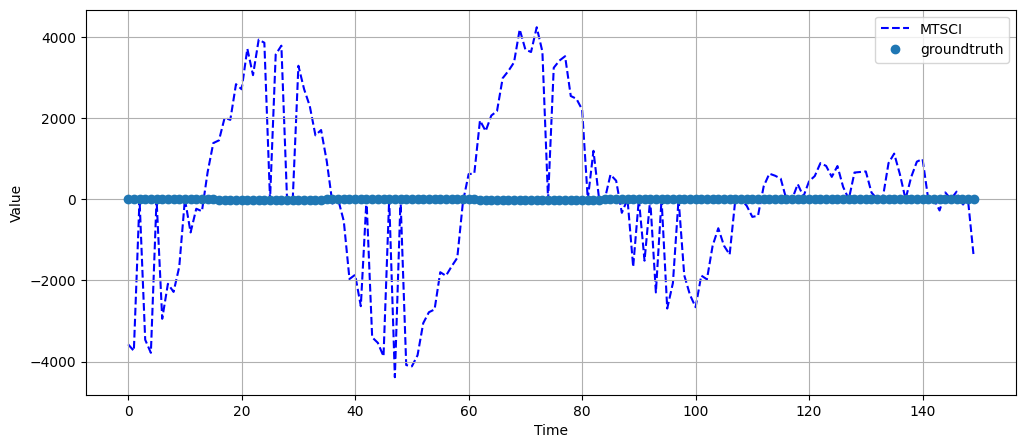

In [23]:
import matplotlib.pyplot as plt
# Create plot
plt.figure(figsize=(12, 5))

x = np.arange(0, 150, 1)

sample = 1

# Plot ground truth
plt.plot( results["imputed_data"][150:300,5], 'b--', label='MTSCI', zorder=1)

# Plot observed data
plt.plot( results["groundtruth"][150:300,5], 'o', label='groundtruth', zorder=2)

# Plot MTSI
# plt.plot(results["imputed_data"][150:300,1], '--', color='red', label='MTSCI', zorder=4)

# Fill between Ground-truth and MTSI for visualization
# plt.fill_between(x, ground_truth, mtsci, color='gray', alpha=0.3)

# Add legend
plt.legend()

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)

# Show plot
plt.show()